In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [ ]:
#Assignment 1
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#one hot encoding
df = pd.get_dummies(df) #fungsinya untuk mengubah jadi 0 1 agar dapat ditampilin menggunakan matplotlib
df= df.fillna(0) #karena terdapat data NaN (Not a Number), sehingga tidak bisa ditampilkan. Jadi data tersebut harus diisi, nah disini saya mengisi menggunakan fungsi fill.na dengan nilai 0
df.head() #Menampilkan 5 data teratas

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns != 'SalePrice'] #menampilkan seluruh kolom terkecuali (simbol !=) kolom saleprice
y = df['SalePrice'] #hanya menampilkan kolom saleprice untuk sumbu y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)

In [ ]:
#membuat regresi linear multivariable
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train, y_train)

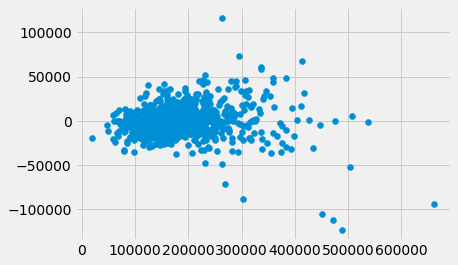

In [ ]:
plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train) #dalam bentuk prediksi, dan sumbu x adalah prediksi pakai X_train, sedangkan sumbu y pakai prediksi X_train dikurangi y_Train (kalau y_train doang error)
plt.show()

In [ ]:
#analisa 3 metric
#MAE
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test) 
mean_absolute_error(y_test, y_pred)

20824.29057396405

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2018917640.0390863

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared= False)

44932.367398558985

In [ ]:
#Assignment 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 df2 = pd.read_csv("heart.csv")
 df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
#OneHotEncoding
df2 = pd.get_dummies(df2) #Mengubah kolom yang dikehendaki menjadi 0 dan 1, tujuannya supaya dapat ditampilkan
#Tidak perlu fungsi df2.fillna() seperti soal sebelumnya, karena dalam data ini tidak terdapat NaN.
df2.head() #Menampilkan 5 data teratas

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x = df2.loc[:, df2.columns != 'HeartDisease'] #menampilkan seluruh tabel terhadap y kecuali heartdisease
y = df2['HeartDisease'] #hanya menampilkan kolom heartdisease
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 5, n_estimators = 100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
#Menggunakan Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs =-1)
params = {'max_depth':[2,3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100,200],
          'n_estimators' : [10,25,30,50,100,200]}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid = params, cv= 4, n_jobs= -1, verbose =1, scoring= 'accuracy')
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_ #konteks hasil sangat bagus karena mendekati 1 

0.8708611022955675

In [ ]:
#Evaluasi
#Confussion Matrix
from sklearn.metrics import confusion_matrix
rf_best = grid_search.best_estimator_ 
y_rf =rf_best.predict(X_test)
print(confusion_matrix(y_test,y_rf))

[[127  26]
 [ 20 195]]


In [ ]:
#AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label = 1)
print(auc(fpr,tpr))

0.8685210518315852


In [ ]:
#Classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.88      0.91      0.89       215

    accuracy                           0.88       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.87      0.88      0.87       368

